# MLPR LAB 6
### PROSHITA AGARWAL

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
train = pd.read_csv('tblTrain.csv')
test = pd.read_csv('tblTest.csv')

print(train)
print()
print(test)

                                    Name  Duration   Genre  Rating
0     #Gadhvi (He thought he was Gandhi)        99   Drama     7.0
1                               @Andheri       126  Action     4.0
2              1:1.6 An Ode to Lost Love        86   Drama     6.2
3            13B: Fear Has a New Address       136   Drama     7.3
4                            15th August       158   Drama     5.6
...                                  ...       ...     ...     ...
2792  Zor: Never Underestimate the Force       167  Action     4.3
2793                               Zorro       160  Action     5.6
2794                              Zubaan       105   Drama     6.1
2795                               Zulmi       139  Action     4.5
2796                        Zulm-O-Sitam       140  Action     6.2

[2797 rows x 4 columns]

                             Name  Duration   Genre  Rating
0                       ...Yahaan       132   Drama     7.4
1                  15 Park Avenue       106   Dram

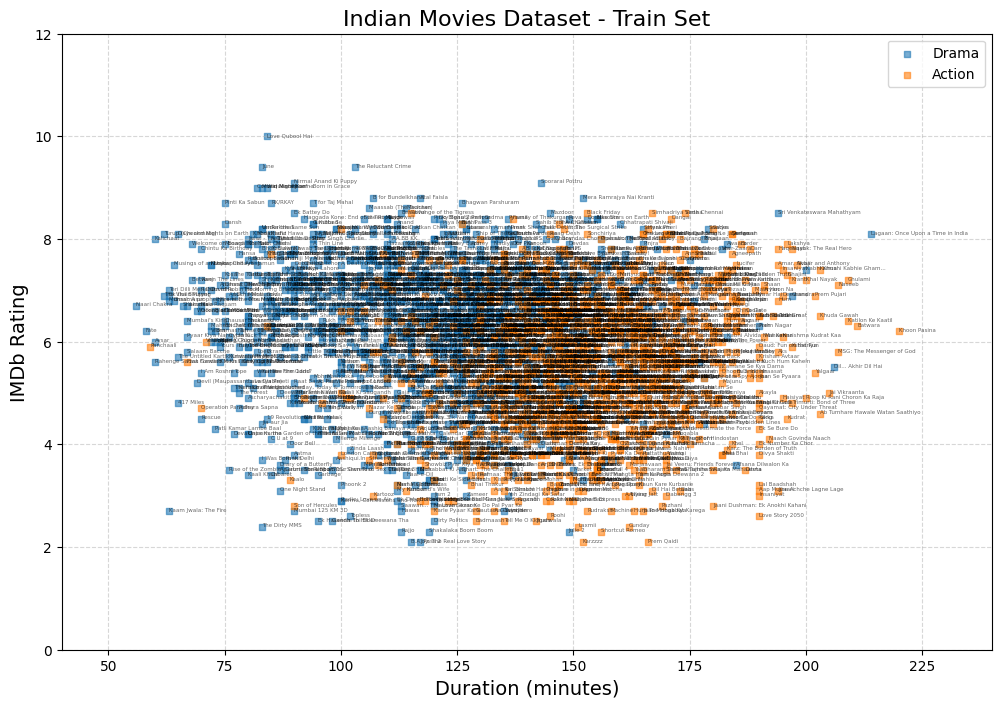

In [12]:
plt.figure(figsize=(12,8))

train_action = train[train["Genre"] == 'Action'] #to filter the training dataset to include only rows where the "Genre" column has the value 'Action'
train_drama = train[train["Genre"] == 'Drama'] #to filter the training dataset to include only rows where the "Genre" column has the value 'Drama'

plt.scatter(train_drama["Duration"], # x-axis values for Drama movies
            train_drama["Rating"], # y-axis values for Drama movies
            marker='s', # specifies that the markers should be square-shaped
            s=15, # controls the size of the markers
            alpha=0.6, # controls the transparency of the markers
            label="Drama")

plt.scatter(train_action["Duration"],
            train_action["Rating"],
            marker='s', 
            s=15,
            alpha=0.6,
            label="Action")

for i in range(len(train)):
    plt.text(train["Duration"].iloc[i], # .iloc[i] selects the value from the i-th row using integer-based indexing
             train["Rating"].iloc[i],
             train["Name"].iloc[i],
             fontsize=4,
             alpha=0.6)

# Labels and title
plt.xlabel("Duration (minutes)", fontsize=14)
plt.ylabel("IMDb Rating", fontsize=14)
plt.title("Indian Movies Dataset - Train Set", fontsize=16)
plt.xlim(40, 240) #to set the limits of the x axis
plt.ylim(0, 12) #to set the limits of the y axis
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig("train_dataset_plot.png", dpi=300) # to save the plot as a PNG file with a resolution of 300 dots per inch (DPI)
plt.show()

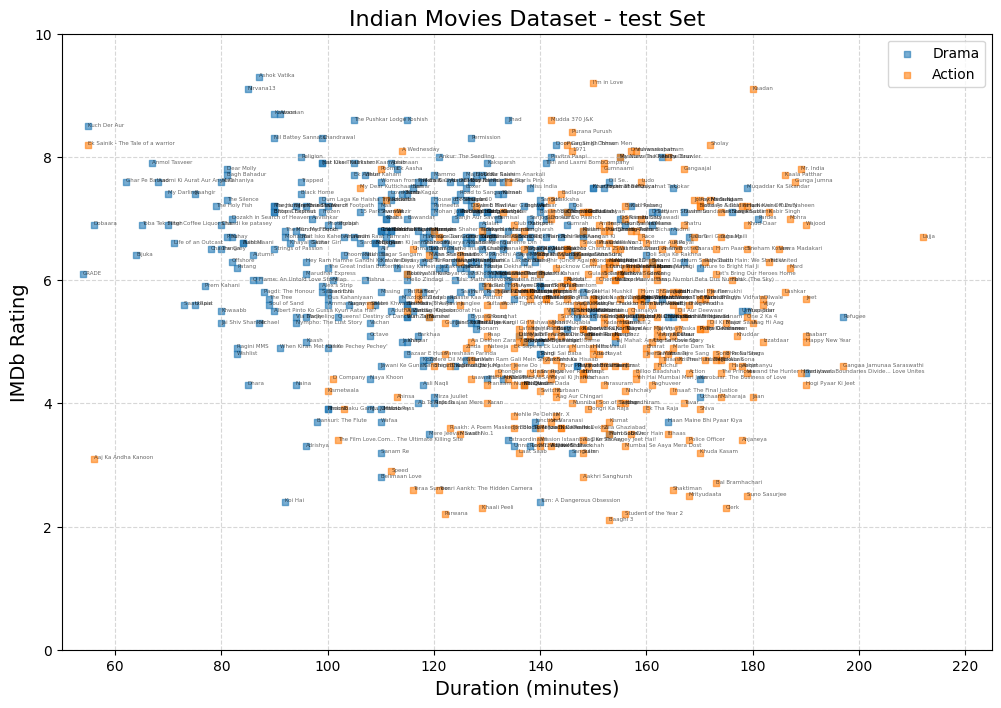

In [17]:
plt.figure(figsize=(12,8))

test_action = test[test["Genre"] == 'Action'] #to filter the testing dataset to include only rows where the "Genre" column has the value 'Action'
test_drama = test[test["Genre"] == 'Drama'] #to filter the testing dataset to include only rows where the "Genre" column has the value 'Drama'

plt.scatter(test_drama["Duration"], # x-axis values for Drama movies
            test_drama["Rating"], # y-axis values for Drama movies
            marker='s', # specifies that the markers should be square-shaped
            s=15, # controls the size of the markers
            alpha=0.6, # controls the transparency of the markers
            label="Drama")

plt.scatter(test_action["Duration"],
            test_action["Rating"],
            marker='s', 
            s=15,
            alpha=0.6,
            label="Action")

for i in range(len(test)):
    plt.text(test["Duration"].iloc[i], # .iloc[i] selects the value from the i-th row using integer-based indexing
             test["Rating"].iloc[i],
             test["Name"].iloc[i],
             fontsize=4,
             alpha=0.6)

# Labels and title
plt.xlabel("Duration (minutes)", fontsize=14)
plt.ylabel("IMDb Rating", fontsize=14)
plt.title("Indian Movies Dataset - test Set", fontsize=16)
plt.xlim(50, 225) #to set the limits of the x axis
plt.ylim(0, 10) #to set the limits of the y axis
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig("test_dataset_plot.png", dpi=300) # to save the plot as a PNG file with a resolution of 300 dots per inch (DPI)
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
# features (x) and labels (y)
x_train = train[["Duration", "Rating"]]
y_train = train["Genre"]

x_test = test[["Duration", "Rating"]]
y_test = test["Genre"]

#define k values (1, 3, 5, ..., 499)
knn_neighbors = list(range(1, 500, 2))

accuracies = []

for k in knn_neighbors:
    
    #creation of KNN model
    model = KNeighborsClassifier(n_neighbors=k)
    
    #training model
    model.fit(x_train, y_train)
    
    #predicting on test set
    y_pred = model.predict(x_test)
    
    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #extracting values
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    #accuracy calculation
    accuracy = (TN + TP) / np.sum(cm)
    
    accuracies.append(accuracy)

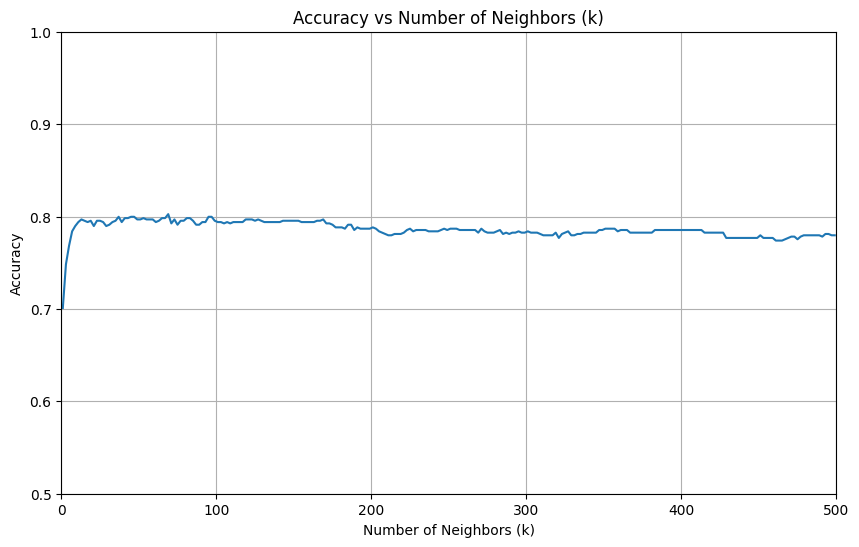

In [25]:
plt.figure(figsize=(10,6))

plt.plot(knn_neighbors, accuracies)

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Neighbors (k)")

plt.xlim(0, 500)
plt.ylim(0.5,1)
plt.grid(True)
plt.show()

In [26]:
#finding maximum accuracy
max_accuracy = max(accuracies)

#finding index of maximum accuracy
index_of_max = accuracies.index(max_accuracy)

#finding corresponding k value
best_k = knn_neighbors[index_of_max]

print("Maximum Accuracy:", max_accuracy)
print("Best k value:", best_k)

Maximum Accuracy: 0.8025751072961373
Best k value: 69


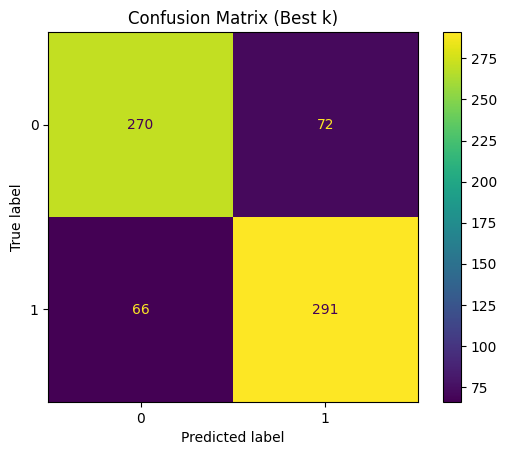

Precision: 0.8016528925619835
Recall: 0.8151260504201681
Overall Precision: 0.802612160566706
Overall Recall: 0.8022998673153472
F-score: 0.8083333333333333


In [29]:
#train model using best k
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(x_train, y_train)

#predict
y_pred_final = final_model.predict(x_test)

# Confusion matrix
cm_final = confusion_matrix(y_test, y_pred_final)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_final)
disp.plot()
plt.title("Confusion Matrix (Best k)")
plt.show()

# Extract values
TN = cm_final[0][0]
FP = cm_final[0][1]
FN = cm_final[1][0]
TP = cm_final[1][1]

# Precision and Recall for Positive class
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Overall Precision and Recall (macro average)
precision_neg = TN / (TN + FN)
recall_neg = TN / (TN + FP)

overall_precision = (precision + precision_neg) / 2
overall_recall = (recall + recall_neg) / 2

# F-score
F_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("F-score:", F_score)

## Report

**1. What does the ‘k’ value in KNN determine?**

The value of k determines the number of nearest neighbors considered when classifying a new data point. The class is assigned based on the majority class among these k neighbors.


**2. How is the optimal ‘k’ value in KNN typically chosen?**

The optimal value of k is usually chosen by testing multiple k values and selecting the one that gives the highest accuracy on validation or test data. This is often done by plotting Accuracy vs k and choosing the k where accuracy is maximum.


**3. How does the value of ‘k’ affect variance and bias in KNN?**

A small k (like k = 1) leads to low bias but high variance because the model becomes sensitive to noise.
A large k leads to high bias but low variance because the model becomes smoother and less sensitive to individual data points.


**4. Is KNN sensitive to outliers, and why?**

Yes, KNN is sensitive to outliers, especially when k is small. Since classification depends on nearby neighbors, an outlier close to a test point can incorrectly influence the prediction.


**5. How does the scale of features affect the performance of KNN?**

KNN is a distance-based algorithm, meaning it classifies points by computing distances (commonly Euclidean distance) between feature values. If the features are on different scales, the feature with the larger numerical range will dominate the distance calculation, even if it is not more important. This can lead to biased and misleading predictions.To prevent this, feature scaling techniques such as normalization or standardization (Z-score scaling) are applied. Scaling ensures that all features contribute equally to the distance computation, allowing KNN to perform more accurately and fairly.